*Project:* Analyzing Customer Purchase Behavior

*Dataset:* https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset

*Objective:*

1. Explore customer demographics and purchase patterns.
2. Identify top-items purchased and categories.
3. Analyze customer loyalty and retention.
4. Determine the impact of pricing and promotions on purchase.

*Python Tasks:*

1. Data Cleaning:
    - I Use Pandas to remove missing or duplicate values.
    - Handle data inconsistencies.
2. Data Exploration:
    - I Use Pandas and Matplotlib to calculate summary statistics and visualize distributions.
3. Customer Analysis:
    - I Use Pandas to segment customers by demographics and purchase behavior.
4. Product Analysis:
    - I Use Pandas and Matplotlib to identify top-selling products and categories.
5. Loyalty and Retention:
    - I Use Pandas to analyze customer loyalty and retention.
6. Pricing and Promotions:
    - I Use Pandas to determine the impact of pricing and promotions on customer purchase.

*Python Libraries:*

1. Pandas for data manipulation and analysis.
2. Matplotlib and Seaborn for data visualization.

*Deliverables:*

1. A written report summarizing findings.
2. Visualizations (e.g., tables, charts, graphs) to support analysis.
3. Python code for all tasks and analyses.

*Tips and Variations:*

- I Use data visualization tools like Tableau to create interactive dashboards.
- I Incorporated additional datasets (e.g., customer feedback, market trends) for more comprehensive insights.

In [1]:
!pip install pandas
!pip install Matplotlib
!pip install Seaborn
!pip install plotly
!pip install numpy
!pip install scikit-learn

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans 
import plotly.graph_objects as go

In [143]:
df = pd.read_csv(r"C:\Users\HP\Documents\shopping_trends_updated.csv")
df.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly


In [58]:
df.shape

(3900, 18)

In [59]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [60]:
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [61]:
df.duplicated().sum()

0

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [63]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# Customer demographics and purchase patterns.

#### Age

In [142]:
df['Age'].value_counts().head(3)

Age
69    88
57    87
41    86
Name: count, dtype: int64

#### Gender

In [65]:
df['Gender'].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

#### Location

In [144]:
df['Location'].value_counts().head(3)

Location
Montana       96
California    95
Idaho         93
Name: count, dtype: int64

## Visualize Demographics

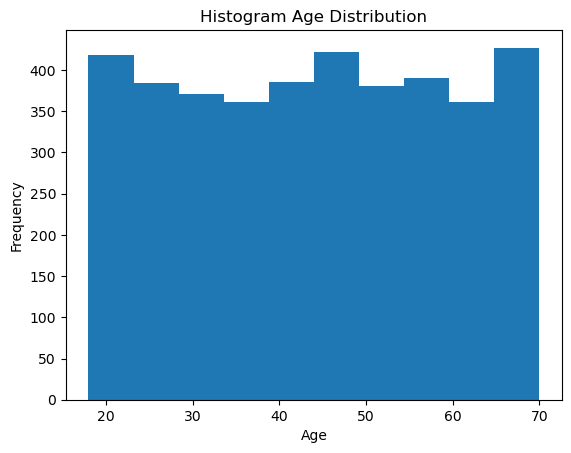

In [216]:
df['Age'].plot.hist()
plt.title('Histogram Age Distribution')
plt.xlabel('Age')
plt.show()

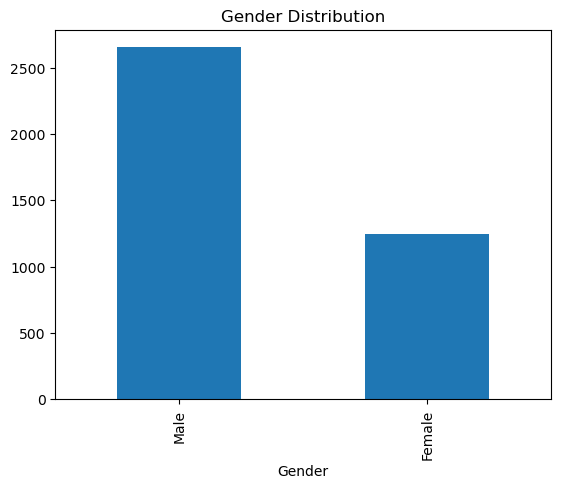

In [69]:
df['Gender'].value_counts().plot.bar()
plt.title('Gender Distribution')
plt.show()

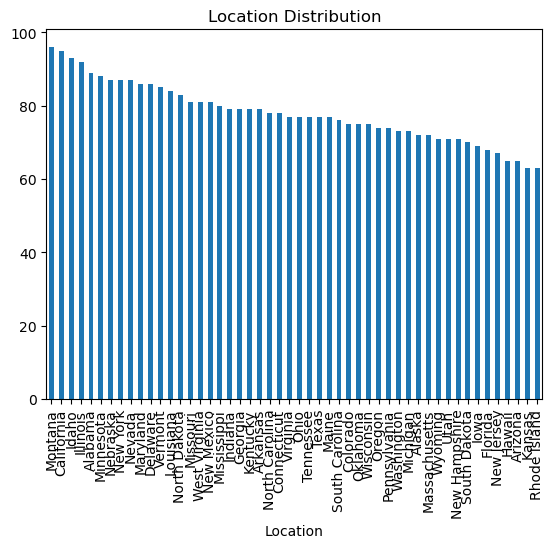

In [70]:
df['Location'].value_counts().plot.bar()
plt.title('Location Distribution')
plt.show()

#### Number of customers per Age Groups

In [149]:
df['Age_Group'] = pd.cut(df['Age'], bins = [0, 25, 45, 65, 85])
df['Age_Group'].value_counts()

Age_Group
(45, 65]    1503
(25, 45]    1471
(0, 25]      571
(65, 85]     355
Name: count, dtype: int64

### Number of Customers in each Age Group per Location (agpl)

In [164]:
df_agpl = pd.crosstab(df['Age_Group'], df['Location'])
df_agpl.transpose().head(3)

Age_Group,"(0, 25]","(25, 45]","(45, 65]","(65, 85]"
Location,,,,
Alabama,19,26,42,2
Alaska,10,30,25,7
Arizona,6,28,25,6


### Number of Customers in each Age Group per Item Purchase (agpip)

In [160]:
df_agpip = pd.crosstab(df['Age_Group'], df['Item Purchased'])
df_agpip.transpose().head(3)

Age_Group,"(0, 25]","(25, 45]","(45, 65]","(65, 85]"
Item Purchased,,,,
Backpack,16,72,45,10
Belt,26,66,55,14
Blouse,23,68,63,17


### Number of Customers in each Age Group per Gender (agpg)

In [147]:
df_agpg = pd.crosstab(df['Age_Group'], df['Gender'])
df_agpg

Gender,Female,Male
Age_Group,,
"(0, 25]",173,398
"(25, 45]",485,986
"(45, 65]",486,1017
"(65, 85]",104,251


#### Gender segment: Recent & Previous Purchase (rpp) by Gender

In [112]:
df_grpp = df.groupby('Gender')[['Purchase Amount (USD)', 'Previous Purchases']].agg(['max','min','count', 'sum', 'mean'])
df_grpp

Purchase Amount (USD)                              Previous Purchases  \
                         max min count     sum       mean                max   
Gender                                                                         
Female                   100  20  1248   75191  60.249199                 50   
Male                     100  20  2652  157890  59.536199                 50   

                                    
       min count    sum       mean  
Gender                              
Female   1  1248  30696  24.596154  
Male     1  2652  68175  25.707014

#### Location segment: Recent & Previous Purchase (rpp) by Location

In [114]:
df_lrpp = df.groupby('Location')[['Purchase Amount (USD)', 'Previous Purchases']].agg(['max','min','count', 'sum', 'mean'])
df_lrpp.head(5)

Purchase Amount (USD)                             \
                             max min count   sum       mean   
Location                                                      
Alabama                      100  20    89  5261  59.112360   
Alaska                        99  20    72  4867  67.597222   
Arizona                      100  22    65  4326  66.553846   
Arkansas                      99  22    79  4828  61.113924   
California                   100  20    95  5605  59.000000   

           Previous Purchases                             
                          max min count   sum       mean  
Location                                                  
Alabama                    49   1    89  2443  27.449438  
Alaska                     50   3    72  2023  28.097222  
Arizona                    50   2    65  1844  28.369231  
Arkansas                   49   1    79  2138  27.063291  
California                 50   1    95  2327  24.494737

## Analysis of customer Purchasing Pattern

### Top 5 Customer with the Highest Current and Previous Purchases

In [140]:
df.sort_values(by = ['Purchase Amount (USD)', 'Previous Purchases'], ascending = False, ignore_index = True).head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age_Group
0,456,54,Male,Blouse,Clothing,100,Utah,XL,Gold,Fall,3.6,Yes,Store Pickup,Yes,Yes,50,Debit Card,Fortnightly,"(45, 65]"
1,1848,46,Male,Sandals,Footwear,100,Arizona,XL,Cyan,Summer,4.4,No,Free Shipping,No,No,49,Credit Card,Weekly,"(45, 65]"
2,96,37,Male,Sneakers,Footwear,100,Missouri,L,Pink,Fall,3.8,Yes,Free Shipping,Yes,Yes,48,PayPal,Monthly,"(25, 45]"


### Top 5 Customers with the lowest Current and Previous Purchases

In [141]:
df.sort_values(by = ['Purchase Amount (USD)', 'Previous Purchases'], ascending = True, ignore_index = True).head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age_Group
0,1066,59,Male,T-shirt,Clothing,20,Alabama,XL,Blue,Spring,4.1,No,Store Pickup,Yes,Yes,3,PayPal,Every 3 Months,"(45, 65]"
1,3453,26,Female,Jacket,Outerwear,20,Oklahoma,M,Indigo,Spring,3.7,No,Next Day Air,No,No,3,Venmo,Fortnightly,"(25, 45]"
2,3855,57,Female,T-shirt,Clothing,20,Florida,M,Black,Spring,4.2,No,Free Shipping,No,No,4,Venmo,Annually,"(45, 65]"


### Total Purchase Amount (USD)

In [77]:
df['Purchase Amount (USD)'].sum()

233081

### Total Previous Purchase Amount (USD)

In [78]:
df['Previous Purchases'].sum()

98871

## Visualizing Purchase Patterns

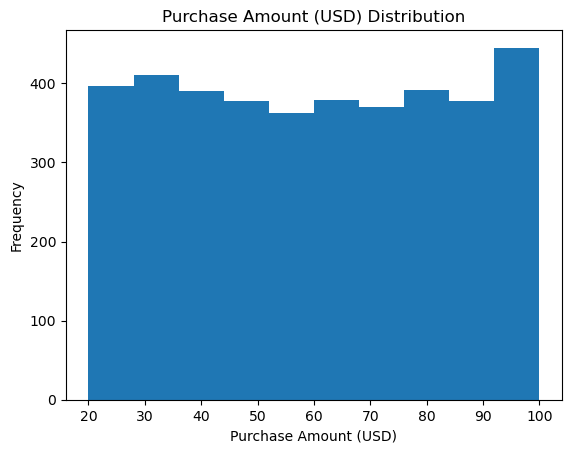

In [81]:
df['Purchase Amount (USD)'].plot.hist()
plt.xlabel('Purchase Amount (USD)')
plt.title('Purchase Amount (USD) Distribution')
plt.show()

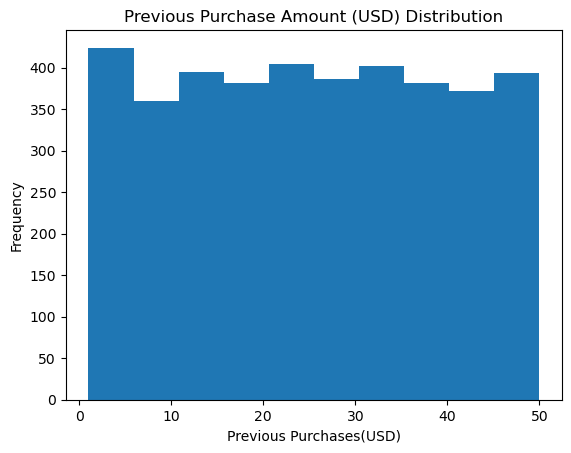

In [82]:
df['Previous Purchases'].plot.hist()
plt.xlabel('Previous Purchases(USD)')
plt.title('Previous Purchase Amount (USD) Distribution')
plt.show()

# Identify top-items Purchased and categories

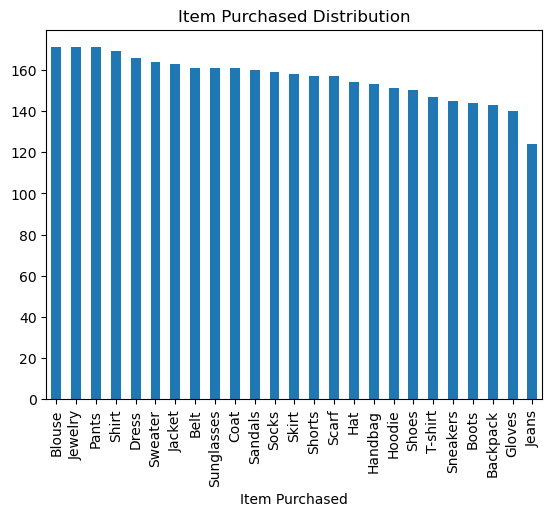

In [85]:
df['Item Purchased'].value_counts().plot.bar()
plt.title('Item Purchased Distribution')
plt.show()

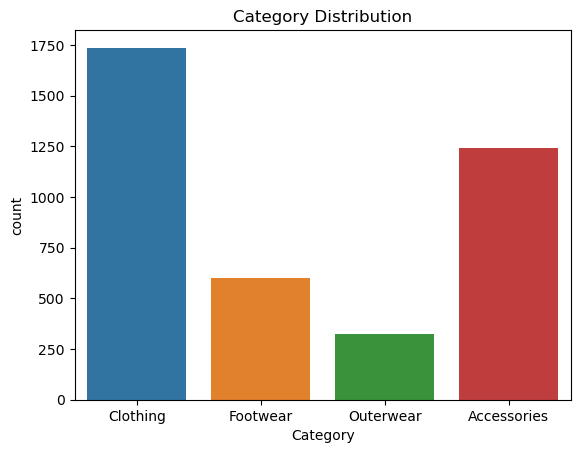

In [138]:
sns.countplot(x = 'Category', data = df)
plt.title('Category Distribution')
plt.show()

### Total item Purchased and Amount (tipaa)

In [139]:
df_tipaa = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum()
df_tipaa.head(5)

Item Purchased
Backpack     8636
Belt         9635
Blouse      10410
Boots        9018
Coat         9275
Name: Purchase Amount (USD), dtype: int64

## Top Items Purchased (tip)

In [137]:
df_tip = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values( ascending = False , ignore_index = False)
df_tip.head(1)

Item Purchased
Blouse    10410
Name: Purchase Amount (USD), dtype: int64

## Top Purchase by Category (tpc)

In [136]:
df_tpc = df.groupby('Category')['Purchase Amount (USD)'].sum().sort_values( ascending = False , ignore_index = False)
df_tpc.head(1)

Category
Clothing    104264
Name: Purchase Amount (USD), dtype: int64

# Analysis of customer loyalty and retention.

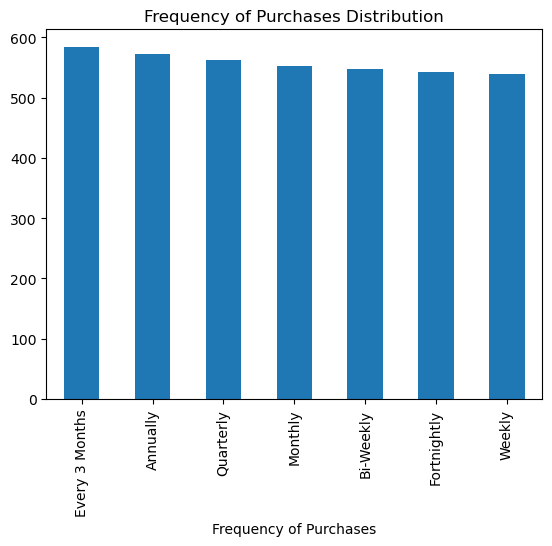

In [166]:
df['Frequency of Purchases'].value_counts().plot.bar()
plt.title('Frequency of Purchases Distribution')
plt.show()

### Frequency of Purchases by Purchase Amount foppa (USD)

In [245]:
df_foppa = df.groupby('Frequency_of_Purchases')['Purchase Amount (USD)'].sum().sort_values(ascending = False, ignore_index = False)
df_foppa

Frequency_of_Purchases
Every 3 Months    35088
Annually          34419
Quarterly         33771
Bi-Weekly         33200
Monthly           32810
Fortnightly       32007
Weekly            31786
Name: Purchase Amount (USD), dtype: int64

### Customers with the highest order (cho)

In [275]:
df['Average_order_value'] = df.groupby('Customer ID')['Purchase Amount (USD)'].transform('mean')

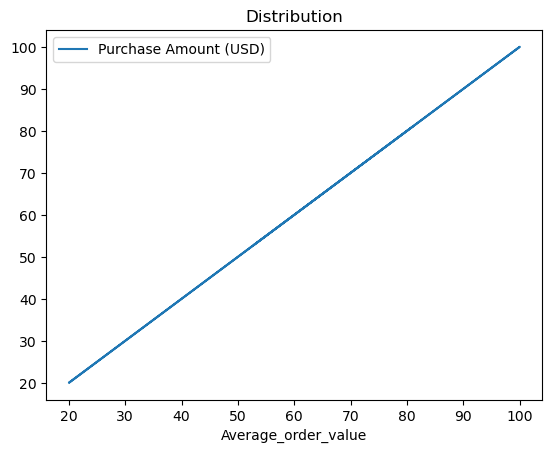

In [299]:
df.plot.line(x = 'Average_order_value', y = 'Purchase Amount (USD)' )
plt.title('Distribution')
plt.show()

In [288]:
df_cho = df[df['Average_order_value'] == 100]
df_cho.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription_Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency_of_Purchases,Age_Group,Average_order_value
42,43,20,Male,Coat,Outerwear,100,Tennessee,M,Beige,Spring,4.1,Yes,Free Shipping,Yes,Yes,15,PayPal,Annually,"(0, 25]",100.0
95,96,37,Male,Sneakers,Footwear,100,Missouri,L,Pink,Fall,3.8,Yes,Free Shipping,Yes,Yes,48,PayPal,Monthly,"(25, 45]",100.0
193,194,36,Male,Belt,Accessories,100,North Dakota,S,Silver,Fall,3.0,Yes,Standard,Yes,Yes,29,Venmo,Annually,"(25, 45]",100.0


### Most Loyal customers

In [239]:
df.rename(columns = {'Frequency of Purchases':'Frequency_of_Purchases'}, inplace = True)

In [262]:
df.query('Frequency_of_Purchases == "Every 3 Months"').head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription_Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency_of_Purchases,Age_Group,Average_order_value
20,21,21,Male,Pants,Clothing,51,Louisiana,M,Black,Winter,2.8,Yes,Express,Yes,Yes,50,Cash,Every 3 Months,"(0, 25]",51.0
27,28,56,Male,Shorts,Clothing,56,Kentucky,L,Cyan,Summer,5.0,Yes,Next Day Air,Yes,Yes,7,Bank Transfer,Every 3 Months,"(45, 65]",56.0
28,29,54,Male,Handbag,Accessories,94,North Carolina,M,Gray,Fall,4.4,Yes,Free Shipping,Yes,Yes,41,PayPal,Every 3 Months,"(45, 65]",94.0


## Retained Customers

In [260]:
df.rename(columns = {'Subscription Status':'Subscription_Status'}, inplace = True)

In [289]:
df.query('Subscription_Status == "Yes"').head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription_Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency_of_Purchases,Age_Group,Average_order_value
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,"(45, 65]",53.0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,"(0, 25]",64.0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,"(45, 65]",73.0


# Impact of pricing and promotions on Purchase

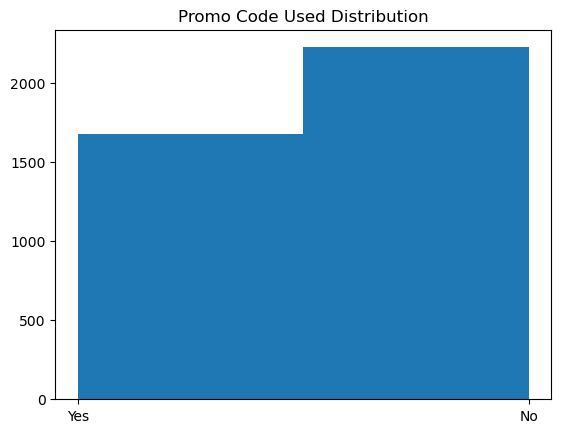

In [307]:
plt.hist(df['Promo Code Used'], bins = 2)
plt.title('Promo Code Used Distribution')
plt.show()

In [223]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_Group',
       'Average_order_value'],
      dtype='object')

In [ ]:
+